<a href="https://colab.research.google.com/github/ankit250505/CardioVascular-Disease-Prediction-System/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

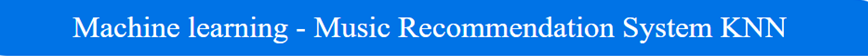

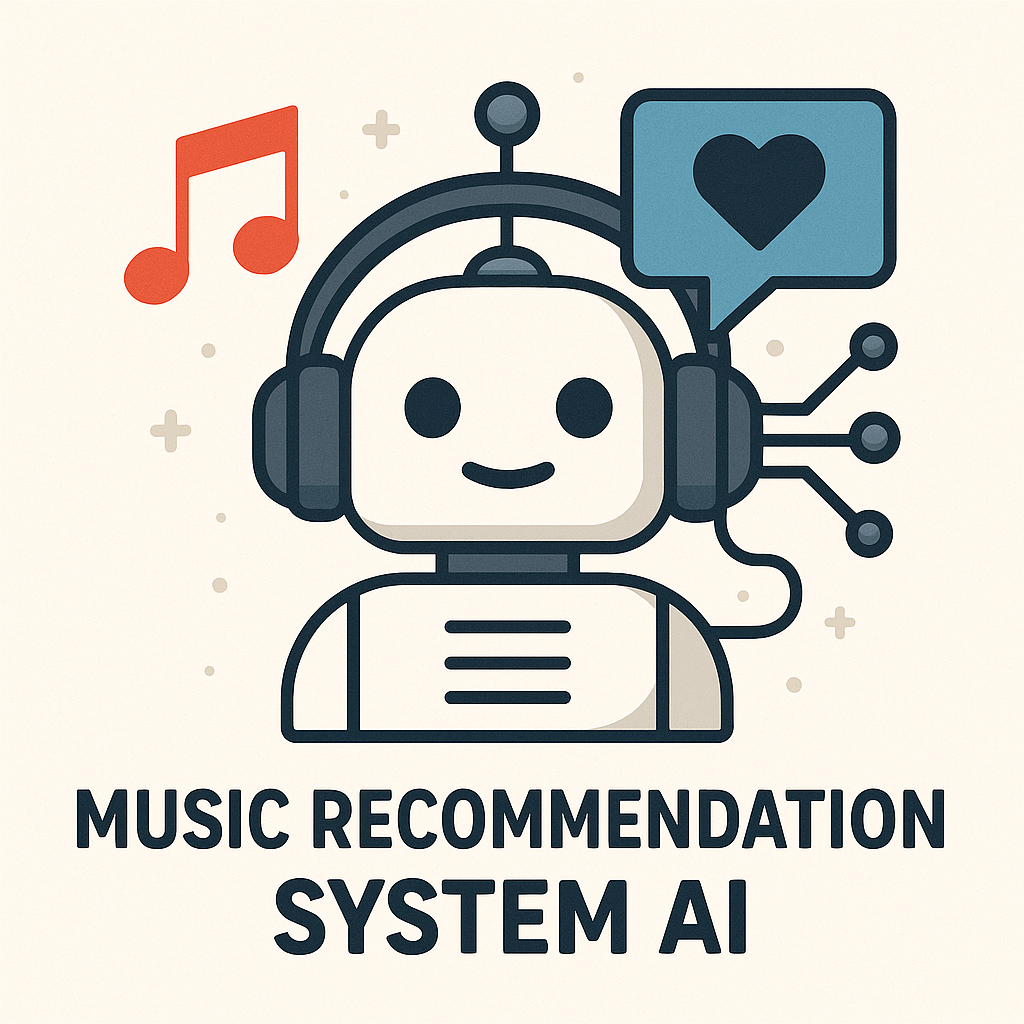

---
# Part 1- Music Recommendation System

---
**Context-**

You have a dataset that contains detailed information about songs, including musical characteristics, popularity, and metadata related to albums and playlists. The goal is to create a recommendation system that can suggest relevant songs to users based on their musical interests, known and liked songs, or general preferences.


**Objective-**

Develop a recommendation system model that can suggest songs from an existing database using features such as danceability, energy, valence, among others. This system should be able to provide personalized recommendations for specific users or playlists, increasing user engagement and satisfaction.


**Justification-**

In the competitive digital music market, accurate and personalized recommendations are crucial for maintaining user engagement and promoting new songs. An effective recommendation system can not only increase playtime and user satisfaction but also help discover new talents and songs that align with the preferences of different audience segments.



---
# Methodology
---
**1. Exploratory Data Analysis (EDA):**

Objective:
Understand the data distribution, detect outliers, and explore correlations between musical features and popularity.

Tasks:

Analyze the distribution of continuous variables (danceability, energy, tempo, etc.).
Explore the correlation between popularity (track_popularity) and musical characteristics.

---
---
**2. Data Preprocessing:**

Objective:
Prepare the data for the recommendation model.

Tasks:


Normalize continuous variables to ensure they are on the same scale.
Handle missing values or inconsistencies in the data.

---
---
**3. Building the Recommendation Model:**
    
**a. Content-Based Filtering:**

Objective: Recommend songs similar to those based on their characteristics.

Method: Use KNN (K-Nearest Neighbors) with cosine similarity metric.

**b. Collaborative Filtering (if applicable):**

Objective: Recommend songs based on similar preferences of other users (if user interaction data is available).

**c. Hybrid Systems:**

Objective: Combine content-based and collaborative recommendations to improve accuracy.


---
---
**4. Model Evaluation:**

Objective:Measure the effectiveness of the recommendations.
Metrics:
Recommendation accuracy (can be measured by RMSE if evaluation data is available).
Acceptance rate of recommendations (if interaction data is available).

Tasks:
Test different k values in KNN.
Validate the model with a test dataset.

---
---
**5. Implementing the Recommendation System:**

Objective: Integrate the model into an application or service where it can provide real-time recommendations.

Tasks:
Create an API or web service that consumes the recommendation model.
Implement a feedback mechanism to improve recommendations over time.

---
---
**6.Monitoring and Continuous Improvement:**

Objective: Maintain the effectiveness of the recommendation system over time.

Tasks:
Monitor the model's performance after deployment.
Periodically adjust and retrain the model with new data.





#**Installing packages**

In [ ]:
# Library for File Manipulation
import pandas as pd
import numpy as np


# Library for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to import the input data files in the form of CSV format
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATABASE**

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/spotify dataset.csv")
df1

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [ ]:
# viewing first 5 data
df1.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
#viewing last 5 data
df1.tail(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [ ]:
# to fetch the information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# to find the sum of total NULL value since there are more than 1000 records..
df1.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [ ]:
# to remove the null values of the dataset so that it wont affect the arithmetic functioning further like mean,average, addition to prevent string error
df=df1.dropna()

In [ ]:
# to access the data types of each entry
df.dtypes

,0
track_id,object
track_name,object
track_artist,object
track_popularity,int64
track_album_id,object
track_album_name,object
track_album_release_date,object
playlist_name,object
playlist_id,object
playlist_genre,object


In [ ]:
# viewing the total rows and columns
df.shape

(32828, 23)

In [ ]:
#copying the data in a seperate file named "ddf"
ddf=df.copy()

#**Exploratory data analysis**

In [ ]:
# renaming the columns for better readability
df.rename(columns=
    {
        "track_id":"id",
        "track_name":"name",
        "track_artist":"artist",
        "track_popularity":"popularity",
        "track_album_id":"alb_id",
        "track_album_name":"alb_name",
        "track_album_release_date":"alb_rel_date",
        "track_album_total_tracks":"alb_ttl_tracks",
        "playlist_name":"plt_name",
        "playlist_id":"plt_id",
        "playlist_genre":"plt_genre",
        "playlist_subgenre":"plt_subgenre",
        "danceability":"dance",
        "energy":"enrgy",
        "key":"key",
        "loudness":"loud",
        "mode":"mode",
        "speechiness":"speech",
        "acousticness":"acoust",
        "instrumentalness":"instrum",
        "liveness":"live",
        "valence":"valence",
        "tempo":"temp",
        "duration_ms":"dur"
      },inplace=True
)
df

<ipython-input-120-aa37cb84da06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=


,id,name,artist,popularity,alb_id,alb_name,alb_rel_date,plt_name,plt_id,plt_genre,...,key,loud,mode,speech,acoust,instrum,live,valence,temp,dur
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


<ipython-input-121-907e5d43b6f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index,palette='bright')


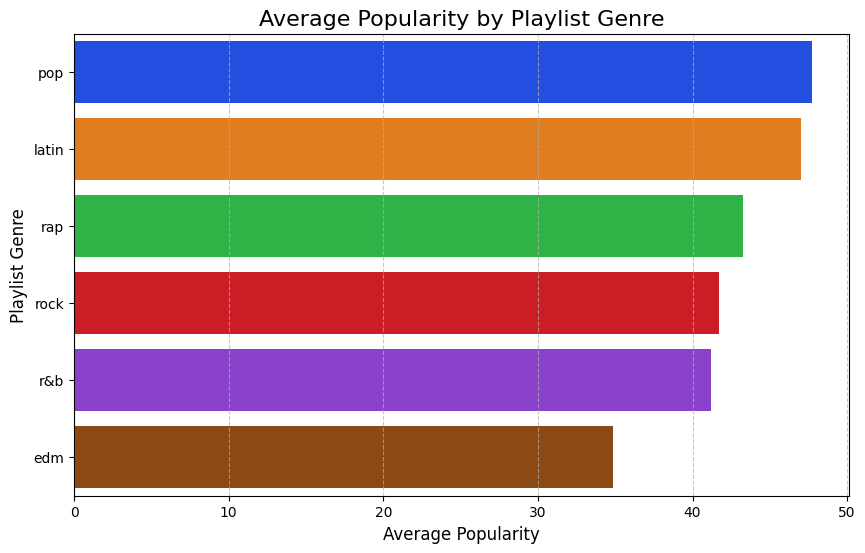

In [ ]:
# Average popularity by playlist genre, sorted in descending order
playlist_popularity = df.groupby('plt_genre')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index,palette='bright')

# Enhancing readability
plt.title('Average Popularity by Playlist Genre', fontsize=16)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Playlist Genre', fontsize=12)

# gridlines for comparison betwen the different playlist genres
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-122-d824381c68f0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dance'], shade=True, label='Danceability', color='yellow', alpha=0.5)   # alpha determines the color tone of the plot
<ipython-input-122-d824381c68f0>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['enrgy'], shade=True, label='Energy', color='blue', alpha=0.5)


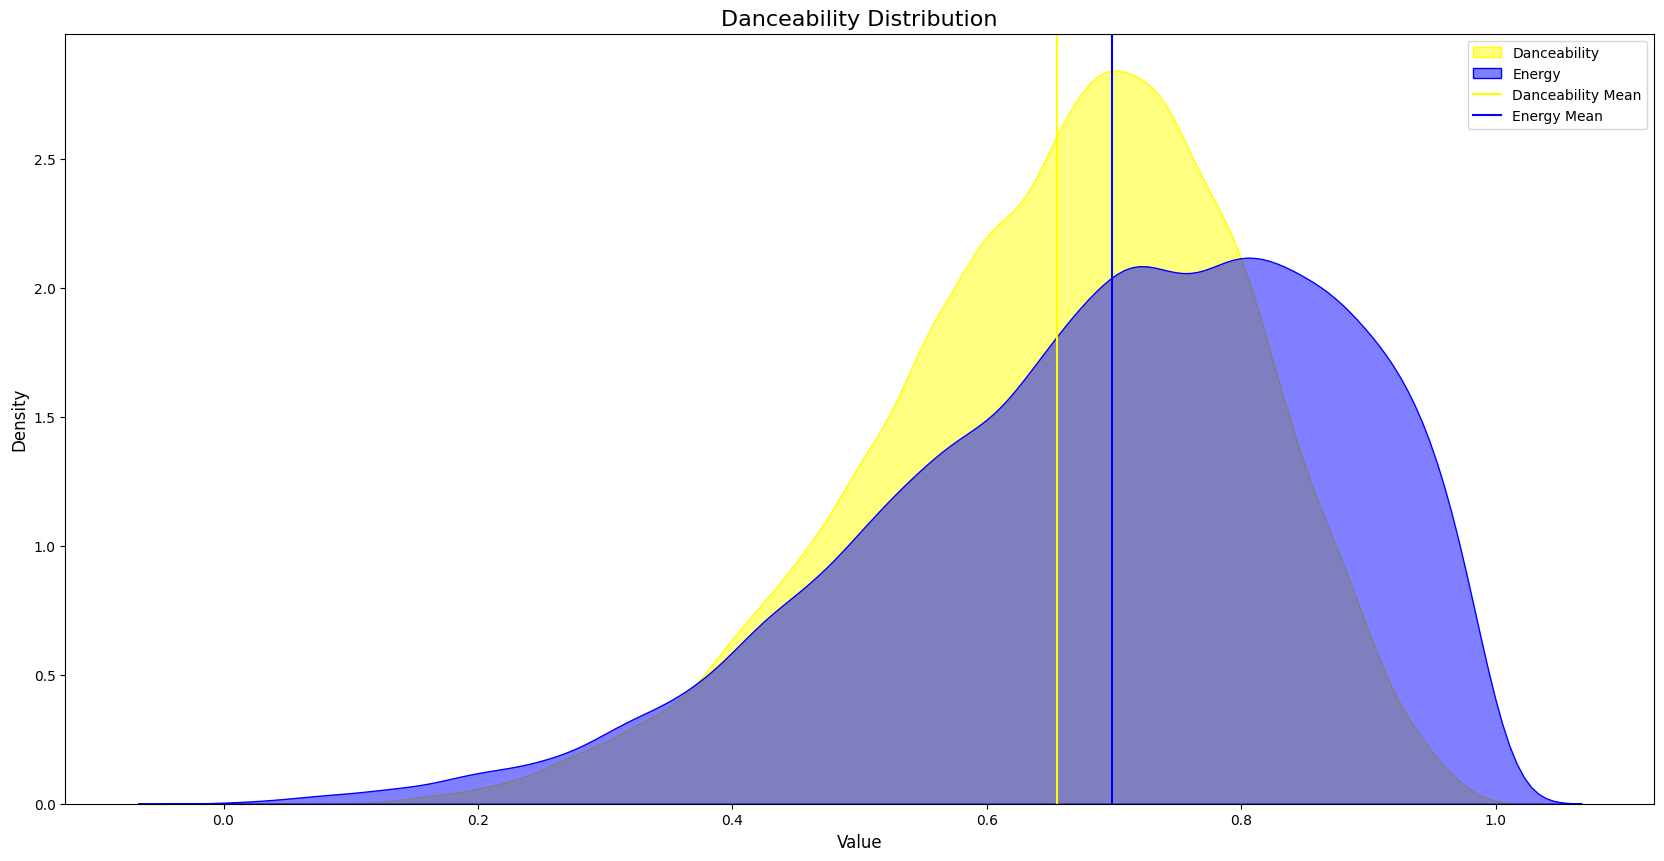

In [ ]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(df['dance'], shade=True, label='Danceability', color='yellow', alpha=0.5)   # alpha determines the color tone of the plot
sns.kdeplot(df['enrgy'], shade=True, label='Energy', color='blue', alpha=0.5)
plt.axvline(df['dance'].mean(), color='yellow', label='Danceability Mean')         # df[].mean() - plots a straight line indicating the mean/average of the data
plt.axvline(df['enrgy'].mean(), color='blue',  label='Energy Mean')
plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(False)
plt.show()

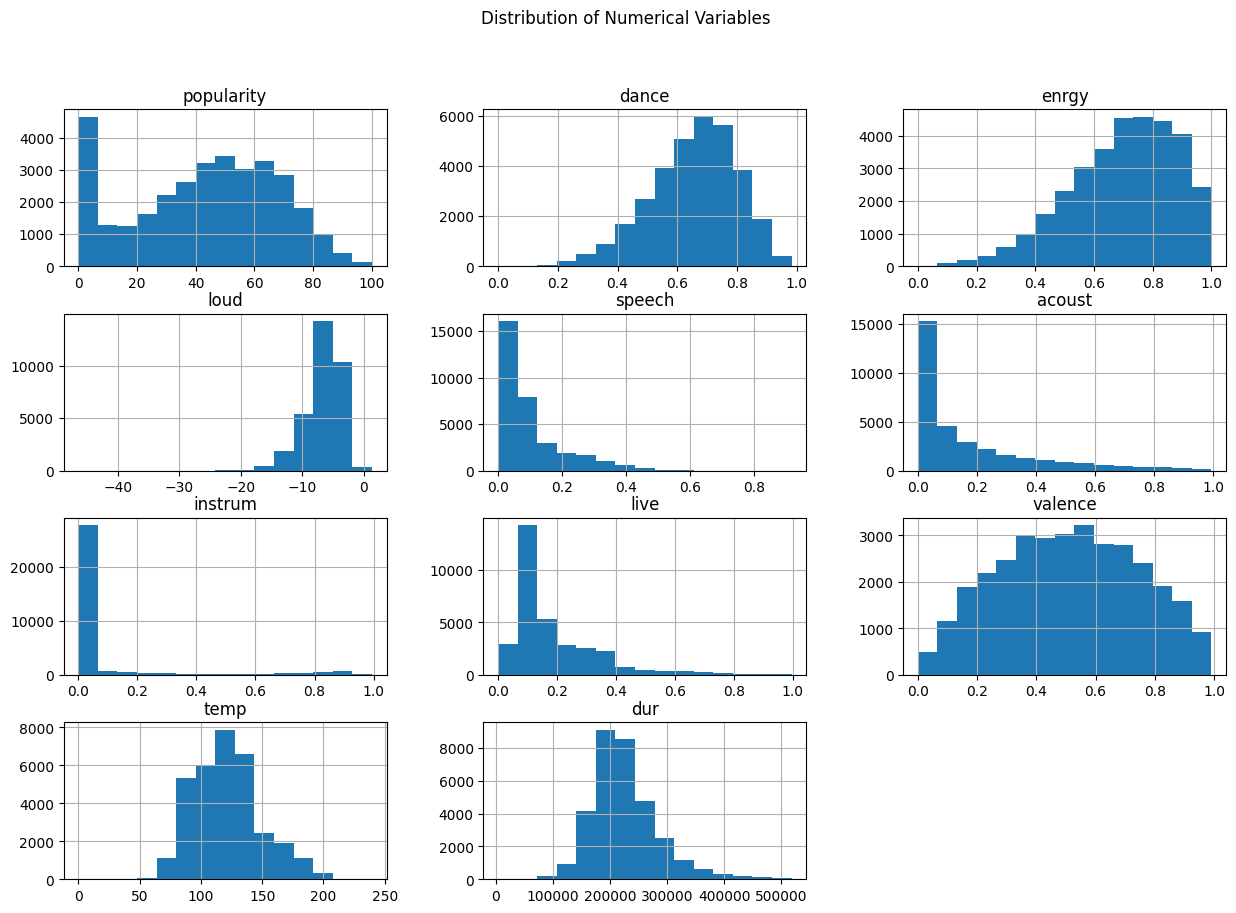

In [ ]:
# to plot 1v1 graphs against each column
numerical_columns = ['popularity', 'dance', 'enrgy', 'loud', 'speech','acoust', 'instrum', 'live', 'valence', 'temp', 'dur']
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()


In [ ]:
# Frequency of categorical variables
print(df['plt_genre'].value_counts())
print()

# Top 10 most frequent artists
print(df['artist'].value_counts().head(10))

plt_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64

artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


#**TRAINING AND TESTING DIVISION**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df,train_size=0.8)
print(train_data.shape)

(26262, 23)


In [ ]:
print(test_data.shape)

(6566, 23)


#**MATRIX INTERACTION**

In [ ]:
# Converting to numpy matrix interaction_matrix_matrix = interaction_matrix.values
interaction_matrix = train_data.pivot_table(index='plt_id', columns='id', values='popularity').fillna(0)

#**VALUE OF K**

**Finding the Value of k:**

---
In machine learning, particularly in K-Nearest Neighbors (KNN) algorithms, the value of k determines the number of nearest neighbors that are taken into account when making a prediction or classification. Choosing the right value of k is essential because it significantly affects the model's performance.

**Key Considerations:**

---

**Small k:**

A small value of k, such as k=1, makes the model sensitive to noise in the data. The model might have high variance, leading to overfitting, as it tries to perfectly match the training data.

**Large k:**

A larger value of k provides a smoother decision boundary, which might reduce variance but increase bias. While this may improve generalization, it could also lead to underfitting, where the model is too simplistic.

**Odd k:**

An odd value for k is often preferred in binary classification problems to avoid ties, especially when the number of classes is even.

**Finding the Optimal k:**

Cross-Validation:
The most common method to find the optimal value of k is to use cross-validation. This involves running the algorithm with different values of k and selecting the one that provides the best performance on a validation dataset.

**Elbow Method:**

Similar to how it’s used in clustering, the elbow method can also be applied by plotting the error rate against different values of k. The point where the error rate starts to flatten out is typically chosen as the optimal k.

**Grid Search:**

A systematic way of searching for the optimal k by evaluating the model's performance across a range of k values.

---

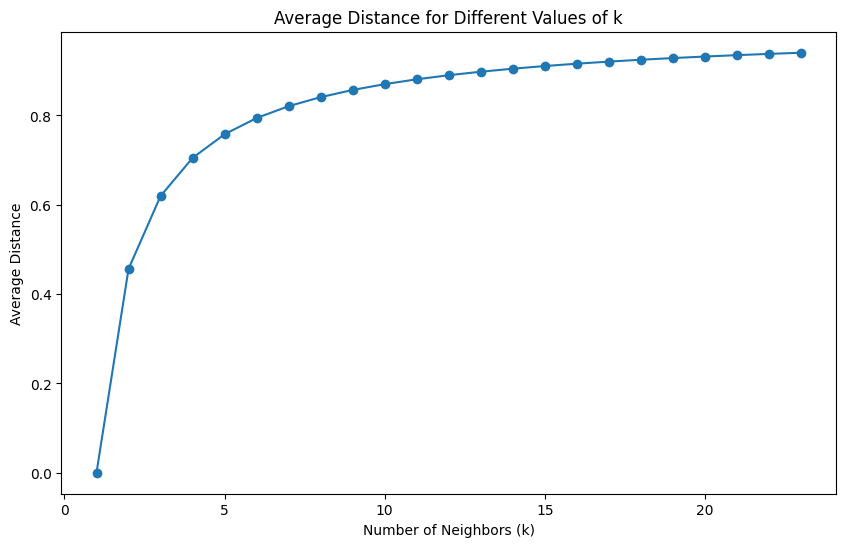

Best value of k: 1


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# List of k values to test
k_values = list(range(1, 24))

# Metric to store the results
mean_distances = []

# Loop to find the best k
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)

    # Compute the distances and indices of the nearest neighbors
    distances, indices = model.kneighbors(interaction_matrix)

    # Calculate the average distance to the nearest neighbors
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Plotting the average distance metric for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

# Find the best k (the one that minimizes the average distance)
best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

#**Machine learning Collaborative Filtering-Based Recommendation Model**

It calculates the likelihood that a data point will join the groups based on which group the data points closest to it are a part of. When using **k-NN** for classification, you determine how to classify the data according to its nearest neighbor.

The parameter k in kNN refers to the number of labeled points **(neighbors)** considered for classification. The value of k indicates the number of these points used to determine the result. Our task is to calculate the distance and identify which categories are closest to our unknown entity.

Given a point whose class we do not know, we can try to understand which points in our feature space are closest to it. These points are the **k-nearest** neighbors. Since similar things occupy similar places in feature space, it’s very likely that the point belongs to the same class as its neighbors. Based on that, it’s possible to classify a new point as belonging to one class or another.

**Some advanced methods for selecting k that are suitable for these cases.**


In [ ]:
# Adjusting k to test a larger value
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(interaction_matrix)

NearestNeighbors(metric='cosine', n_neighbors=1)

#**Making recommendation**

In [ ]:
# Predefined song to base recommendations on
# Replace with the song you want to start with
default_song_name = "All the Time - Don Diablo Remix"

def recommend_songs(df, model, interaction_matrix, song_name=default_song_name, k=10):
    # Find the playlist(s) that contain the predefined song
    song_playlists = df[df['name'].str.contains(song_name, case=False, na=False)]['plt_id'].unique()

    if len(song_playlists) == 0:
        print("Song not found in the dataset.")
        return

    # Get the index of the first playlist where the song was found
    playlist_id = song_playlists[0]

    # Get unique playlist IDs and their corresponding indices in interaction_matrix
    unique_playlists = df['plt_id'].unique()

    if playlist_id not in unique_playlists:
        print("Playlist ID not found in unique playlists.")
        return

    playlist_index = np.where(unique_playlists == playlist_id)[0][0]

    # Find similar playlists using KNN
    try:
        # If interaction_matrix is a DataFrame, use .iloc to get the row
        if isinstance(interaction_matrix, pd.DataFrame):
            distances, indices = model.kneighbors(interaction_matrix.iloc[playlist_index].values.reshape(1, -1), n_neighbors=k+1)
        else:
            distances, indices = model.kneighbors(interaction_matrix[playlist_index].reshape(1, -1), n_neighbors=k+1)
    except IndexError:
        print("Playlist index is out of bounds in the interaction matrix.")
        return

    # Remove the index of the original playlist
    similar_playlists = indices.flatten()[1:]  # Ignoring the first one, which is the original playlist

    # Identify songs to recommend
    original_playlist_tracks = set(df[df['plt_id'] == playlist_id]['id'])
    recommended_tracks = set()

    for idx in similar_playlists:
        similar_playlist_id = unique_playlists[idx]
        similar_playlist_tracks = set(df[df['plt_id'] == similar_playlist_id]['id'])
        recommended_tracks.update(similar_playlist_tracks - original_playlist_tracks)

    # Display the recommended songs
    if recommended_tracks:
        recommended_tracks_info = df[df['id'].isin(recommended_tracks)][['name', 'artist']].drop_duplicates()
        print("Recommended songs")
        print(recommended_tracks_info)
    else:
        print("No new songs to recommend.")

# Example usage
# Assuming df, model, and interaction_matrix are already defined
print("Música selecionada", default_song_name)
recommend_songs(df, model, interaction_matrix)

Música selecionada All the Time - Don Diablo Remix
Recommended songs
                                      name              artist
525                         Counting Stars         OneRepublic
532                      Lions in the Wild       Martin Garrix
539                          Something New  Axwell /\ Ingrosso
661                             Motivation             Normani
687                                   Tusa             KAROL G
...                                    ...                 ...
32319                          We'll Be Ok            Afrojack
32320                      Where We Belong      Fedde Le Grand
32321                    Yesterday Is Gone         Dash Berlin
32322  You - Tiësto vs. Twoloud Radio Edit            Galantis
32323              You're Gonna Love Again               NERVO

[779 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


#**Recommendation system - Group songs into clusters based on their characteristics and recommend songs within these clusters**

A **Recommendation System** is an algorithmic tool that suggests items to users based on various criteria. In the context of music, a recommendation system analyzes the characteristics of songs, such as genre, tempo, energy, and other audio features, and groups them into clusters.

These clusters represent groups of songs that share similar attributes. Once the songs are clustered, the recommendation system can suggest songs to users based on the clusters they are likely to enjoy. For example, if a user enjoys songs in a particular cluster, the system will recommend other songs within that cluster, ensuring the recommendations align with the user's musical preferences.

**This approach allows for more personalized recommendations, as it considers the inherent similarities between songs, making it easier to suggest new music that fits a user's taste.**

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/spotify dataset.csv")
data1.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
#to remove the null values in the 'data' dataframe to prevent the string conversion errors for arithemetic operations
data=data1.dropna()

In [ ]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']
X = data[features]

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler

# Scale the features
X = df.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Viewing
scaler

StandardScaler()

#**Number of Clusters**

Number of Clusters refers to the number of distinct groups or segments identified within a dataset when performing cluster analysis. Clustering is a technique used in data analysis and machine learning to group similar data points together based on certain characteristics or features.

---
**Clusters:**

A cluster is a collection of data points that are more similar to each other than to data points in other clusters. The similarity is often determined using distance metrics like Euclidean distance, cosine similarity, etc.
Each cluster represents a group of data points that share certain traits, making them distinct from points in other clusters.

**Number of Clusters:**

The "Number of Clusters" is the count of these distinct groups. For example, if you set the number of clusters to 3 in a clustering algorithm, the algorithm will partition the data into 3 distinct groups.
The selection of the number of clusters (often denoted as k in algorithms like k-means) is a critical decision. If the number of clusters is too low, distinct groups in the data may be merged together; if it's too high, you may split data into too many small, less meaningful groups.

**Determining the Optimal Number of Clusters:**

Choosing the right number of clusters is essential for effective clustering. Some common methods to determine the optimal number of clusters include:


*   **Elbow Method:**

 Plotting the sum of squared distances within clusters against the number of clusters. The optimal number of clusters is often found where the plot forms an "elbow."

*   **Silhouette Score:**

 Measures how similar a point is to its own cluster compared to other clusters. Higher silhouette scores indicate better clustering.

*    **Gap Statistic:**

 Compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data.

---





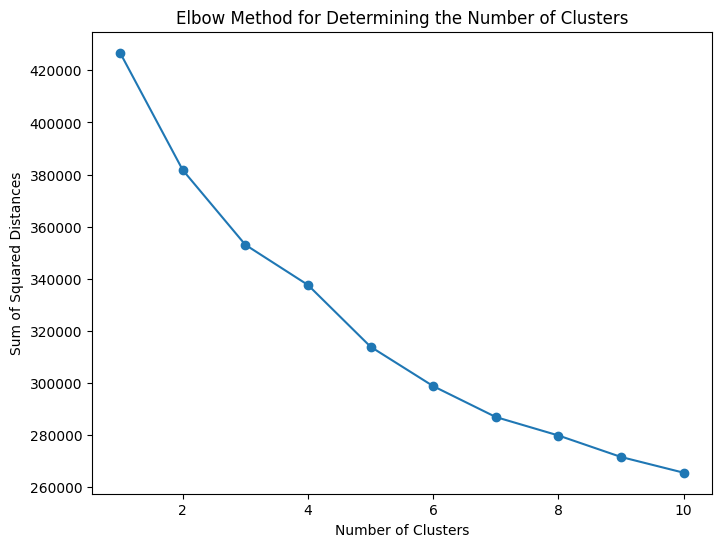

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.grid(False)
plt.show()

In [ ]:
# 4. Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=4,random_state=42)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

<ipython-input-156-f8e6ae6082fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Viewing total cluster
data.cluster_kmeans.value_counts()

,count
cluster_kmeans,
2,12093
0,9609
1,6229
3,4897


<ipython-input-158-54dc32f5451e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='magma')


Text(0.5, 1.0, 'Distribution of Songs by Cluster')

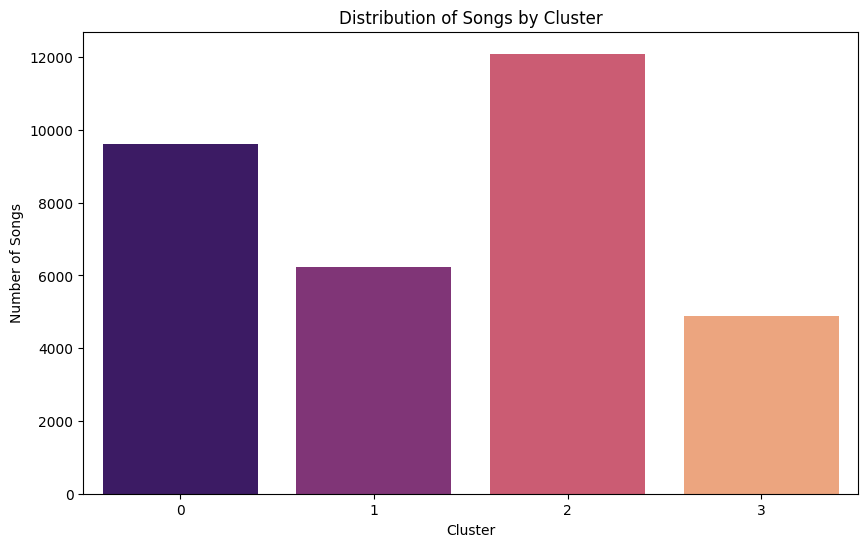

In [ ]:
# Count of songs in each cluster
cluster_counts = data['cluster_kmeans'].value_counts().sort_values(ascending=False)

# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='magma')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Cluster')

In [ ]:
# 2. Perform PCA Analysis


from sklearn.decomposition import PCA
# Initialize the PCA model specifying the number of components to reduce to (in this case, 2 components).
pca = PCA(n_components=2)

# Apply PCA on the scaled feature set X_scaled and transform the data into the new 2-dimensional space.
X_pca = pca.fit_transform(X_scaled)

# Output the PCA model object, which contains information such as the amount of variance explained by each principal component.
pca

PCA(n_components=2)

#**Cluster visualization**

<ipython-input-166-a60331927655>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_kmeans'] = clusters


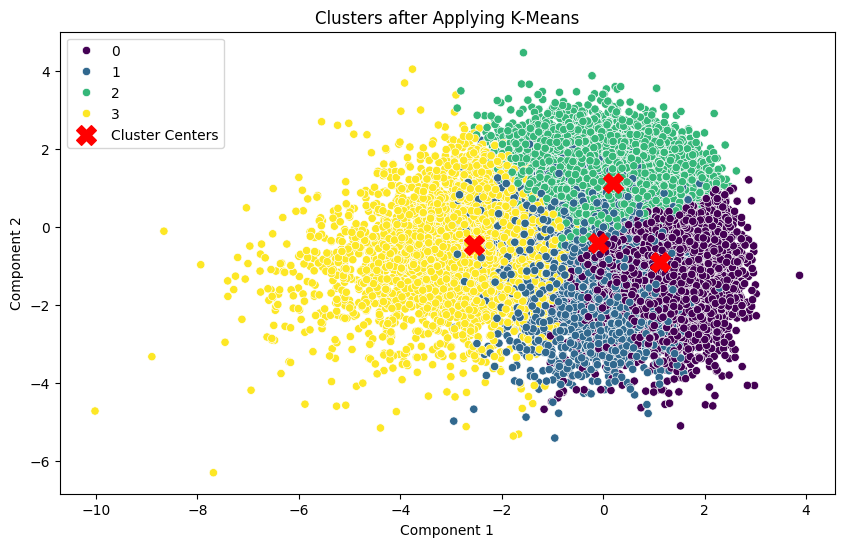

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster_kmeans'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=data['cluster_kmeans'],
                palette='viridis'
               )

# Adding the cluster centers
centers = kmeans.cluster_centers_
# Projecting the centers to the 2D PCA space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='red',
            s=200,
            marker='X',
            label='Cluster Centers')

plt.title('Clusters after Applying K-Means')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [ ]:
# Assuming you want to calculate the mean of features for cluster 0 (since `== 0` is used)
cluster_1_features = data[data['cluster_kmeans'] == 0][features].mean()
print("Mean of Features for Cluster 0:")
print(cluster_1_features)
print()

Mean of Features for Cluster 0:
danceability             0.542480
energy                   0.823788
loudness                -5.096658
speechiness              0.085046
acousticness             0.060389
instrumentalness         0.103147
liveness                 0.254485
valence                  0.385309
tempo                  132.120166
duration_ms         219162.703195
dtype: float64



In [ ]:
# Assuming you want to calculate the mean of features for cluster 1 (since `== 1` is used)
cluster_2_features = data[data['cluster_kmeans'] == 1][features].mean()
print("Mean of Features for Cluster 1:")
print(cluster_2_features)
print()

Mean of Features for Cluster 1:
danceability             0.700133
energy                   0.691127
loudness                -8.016110
speechiness              0.088078
acousticness             0.103493
instrumentalness         0.165567
liveness                 0.156418
valence                  0.584910
tempo                  117.539619
duration_ms         282766.594317
dtype: float64



In [ ]:
#similarly for cluster 2 and 3 we will use the same method,
cluster_3_features = data[data['cluster_kmeans'] == 2][features].mean()
print("Mean of Features for Cluster 2:")
print(cluster_3_features)
print()

cluster_4_features = data[data['cluster_kmeans'] == 3][features].mean()
print("Mean of Features for Cluster 3:")
print(cluster_4_features)
print()

Mean of Features for Cluster 2:
danceability             0.741553
energy                   0.712376
loudness                -5.840183
speechiness              0.141284
acousticness             0.159720
instrumentalness         0.011171
liveness                 0.169109
valence                  0.622185
tempo                  116.872201
duration_ms         205278.817250
dtype: float64

Mean of Features for Cluster 3:
danceability             0.603636
energy                   0.428459
loudness               -10.426226
speechiness              0.089842
acousticness             0.530940
instrumentalness         0.127619
liveness                 0.158948
valence                  0.386075
tempo                  112.994831
duration_ms         217017.369818
dtype: float64



#**Making Recommendation - Cluster Model**

In [ ]:
def recommend_songs(song,data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    selected_song = data[data['track_name'].str.contains(song, case=False, na=False)]

    # If the song is not found, display a message and exit the function
    if selected_song.empty:
        print("Song not found.")
        return None

    # Retrieve the cluster to which the selected song belongs
    cluster = selected_song['cluster_kmeans'].values[0]

    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster_kmeans'] == cluster]

    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]

    # Return only the 'track_name' and 'track_artist' columns, limited to the top 25 recommendations
    return recommended_songs[['track_name', 'track_artist']].head(30)

In [ ]:
# Example of usage
# Replace with the name of the song you want to use as the base for recommendations
song_name = "Talk"
top_recommendations_kmeans = recommend_songs(song_name, data)

# If recommendations are found, print them
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                           track_name      track_artist
0   I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran
1                     Memories - Dillon Francis Remix          Maroon 5
2                     All the Time - Don Diablo Remix      Zara Larsson
4             Someone You Loved - Future Humans Remix     Lewis Capaldi
5   Beautiful People (feat. Khalid) - Jack Wins Remix        Ed Sheeran
9                 If I Can't Have You - Gryffin Remix      Shawn Mendes
10  Cross Me (feat. Chance the Rapper & PnB Rock) ...        Ed Sheeran
12                                         Body On My       Loud Luxury
15  South of the Border (feat. Camila Cabello & Ca...        Ed Sheeran
17  Say My Name (feat. Bebe Rexha & J Balvin) - Lu...      David Guetta
18  Dancing With A Stranger (With Normani) - Cheat...         Sam Smith
21     All Around The World (La La La) - Marnik Remix             R3HAB
22  Don't Leave Me Alone (feat. Anne-Marie) - 